In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
import cmath

In [44]:
#Datos del problema
alpha = 200
c = 7.2 * (10**5)
Tr = 24
Ta = 32
T0 = 30
u0 = 2000
delta = 1

#Defino los tiempos
tfinal = 36000
t0 = 0

def estado(i):
  if T[i] >= Tr + delta: return u0
  elif T[i] <= Tr - delta: return 0

def euler(t0, tf):
  Nt = 1000
  t = np.linspace(t0, tfinal, Nt)
  T = np.zeros(Nt)
  u =np.zeros(Nt)
  h = t[1] - t[0]
  T[0] = T0
  u[0] = u0
  for i in range(0, Nt-1):
      u[i] = estado(i)
      T[i+1] = T[i] + dt*((1/c) * (alpha*(Ta - T[i]) - u[i]))
  return t, T

t, T = euler(t0, tfinal)

plt.plot(t, T)

IndexError: index 100 is out of bounds for axis 0 with size 100

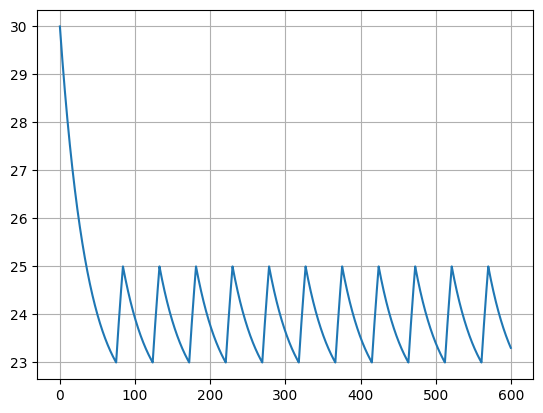

In [71]:
# Datos del problema
alpha = 200
c = 7.2 * (1000)
Tr = 24
Ta = 32
T0 = 30
u0 = 2000
delta = 1
h = 0.01

# Defino los tiempos
tfinal = 600
t0 = 0

def f(T, u):
  return (1/c) * (alpha*(Ta - T) - u)

def aire_acondicionado(f, t0, tf, T0, h):
    tiempo = np.arange(t0, tfinal, h)
    T = [T0]
    u = []
    for t in tiempo:
      if T[-1] >= Tr + delta:
        u.append(u0)
      elif T[-1] <= Tr - delta:
        u.append(0)
      else:
        u.append(u[-1])
      T.append(T[-1] + h*f(T[-1], u[-1]))
    return tiempo, T[:-1], u

t, T, u = aire_acondicionado(f, t0, tfinal, T0, h)
plt.plot(t, T)
plt.grid(True)
plt.show()


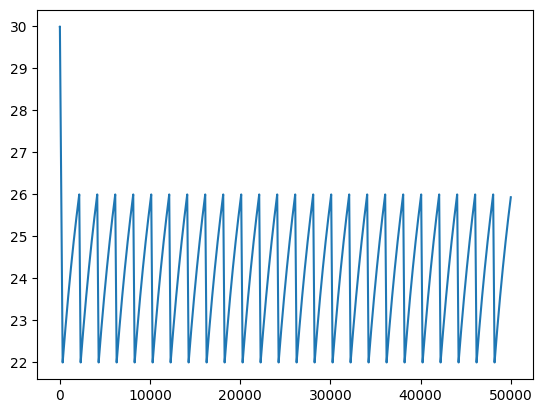

In [69]:
def euler(f, t0, tf, T0, h):
    tiempo = np.arange(t0, tfinal, h)
    X = [x0]
    for t in tiempo:
      X.append(X[-1] + h*f(t[-1], X[-1]))
    return tiempo, X[:-1]

In [ ]:
def euler_v2 (t0,tf,y0,h,F):
    y=[y0]
    tiempos = np.arange(t0,tf,h)
    for t in tiempos:
        y.append(y[-1]+h*F(t,y[-1]))
    return tiempos,y[:-1]

dt=lambda t,x:(200*(32-x))/7.2e6
t,x=euler_v2(0,100,30,0.0001,dt)
#plt.plot(t,x)


f=lambda t:-2*np.exp(-200*t/7.2e6)+32
t=np.linspace(0,100,1000)
plt.plot(t,f(t))